## Assignment 1: EDA

1. Read in `income.csv`
2. Convert the target, `SalStat` into a binary numeric variable called `target`, and build a bar chart that plots the frequency of each value.
3. Explore the numeric features using histograms or boxplots.
4. Explore the categorical features using bar charts.
5. Consider writing functions for steps 3 and 4.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

income = pd.read_csv("../Data/income.csv")

income.head()


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


## Assignment 2: Exploring Relationships

1. Build a Correlation Matrix Heatmap
2. Build a Pairplot
3. Write a function that calculates the mean target rate for each level of categorical variables.

In [27]:
income["SalStat"].value_counts()

SalStat
less than or equal to 50,000    24283
greater than 50,000              7695
Name: count, dtype: int64

<Axes: xlabel='SalStat'>

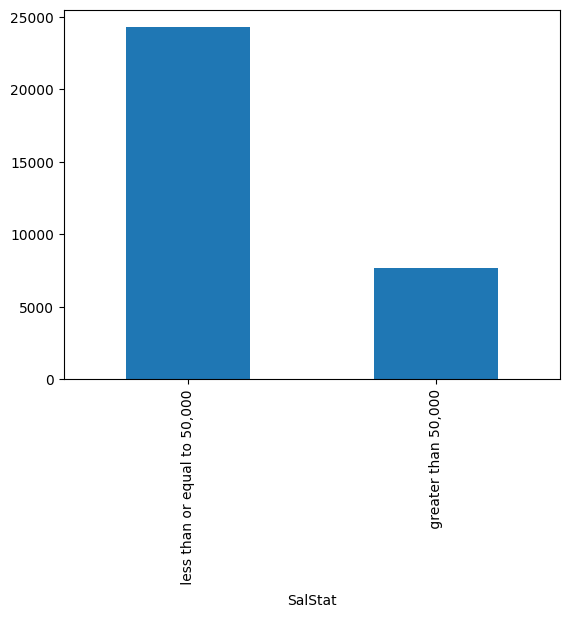

In [28]:
income["SalStat"].value_counts().plot.bar()

In [29]:
income["target"]= np.where(income["SalStat"] == " less than or equal to 50,000", 0, 1)
income["target"].value_counts()

target
0    24283
1     7695
Name: count, dtype: int64

<Axes: xlabel='target'>

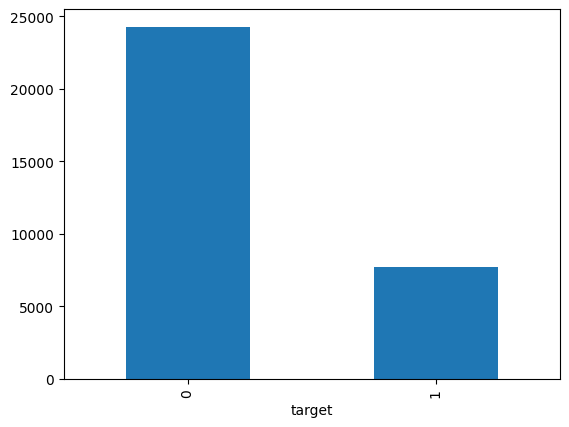

In [30]:
income["target"].value_counts().plot.bar()


In [31]:
def num_box_plotter(data):
    for column in data.select_dtypes("number"):
        sns.boxplot(data[column]).set(ylabel=column)
        plt.show()

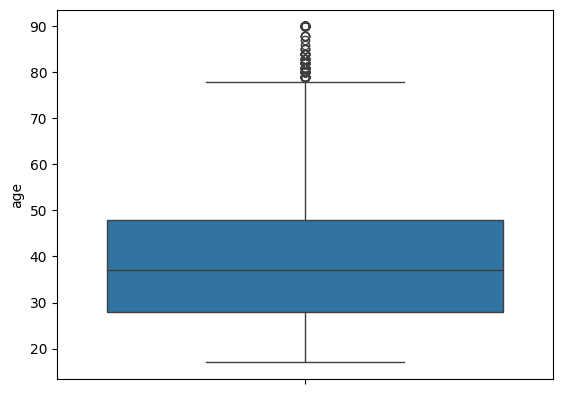

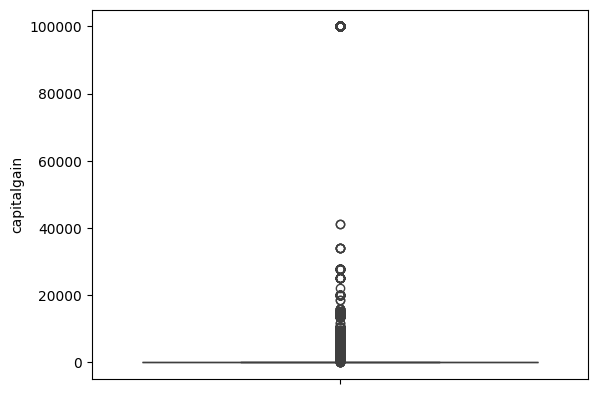

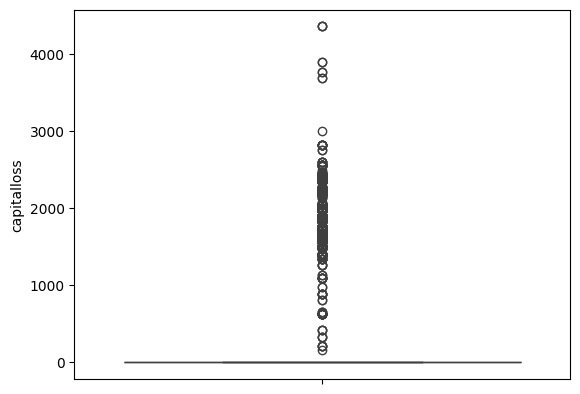

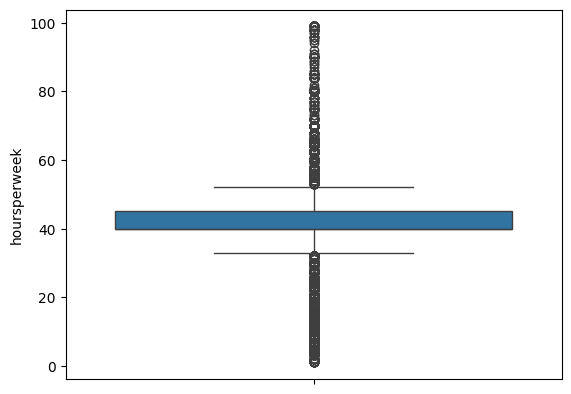

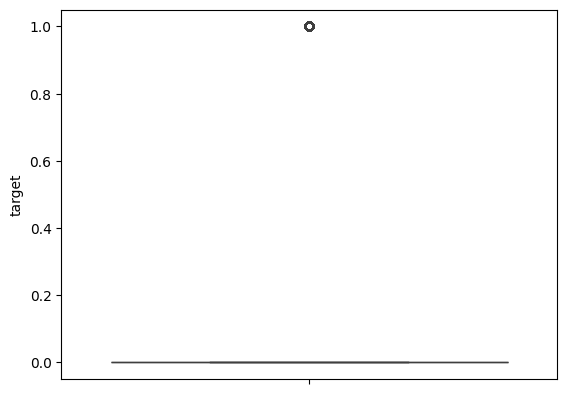

In [32]:
num_box_plotter(income)

In [37]:
def cat_bar_plotter(data, normalize=True):
    for column in data.select_dtypes("object"):
        data[column].value_counts(normalize=normalize).plot.bar()
        plt.show()

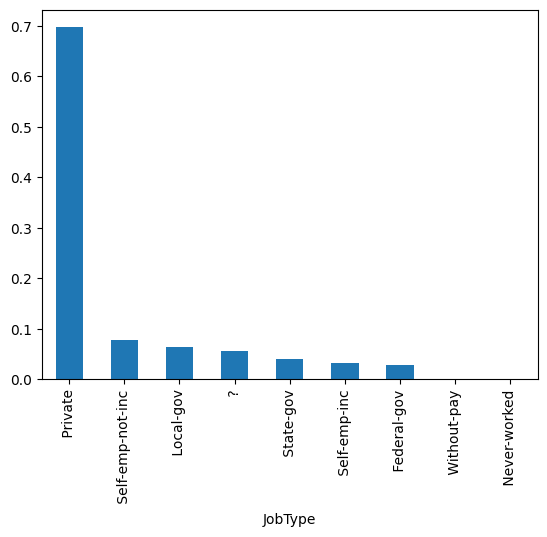

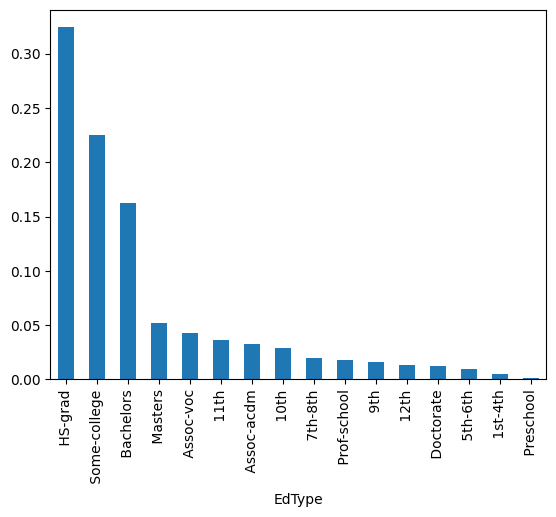

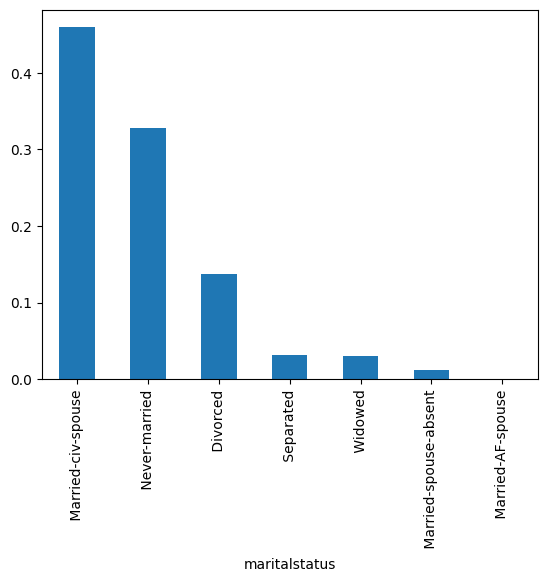

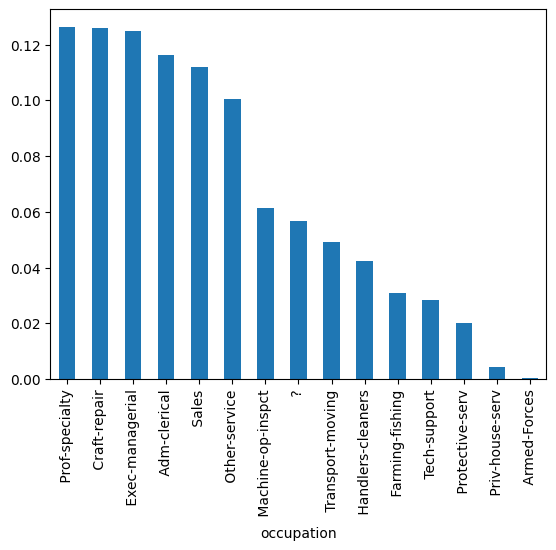

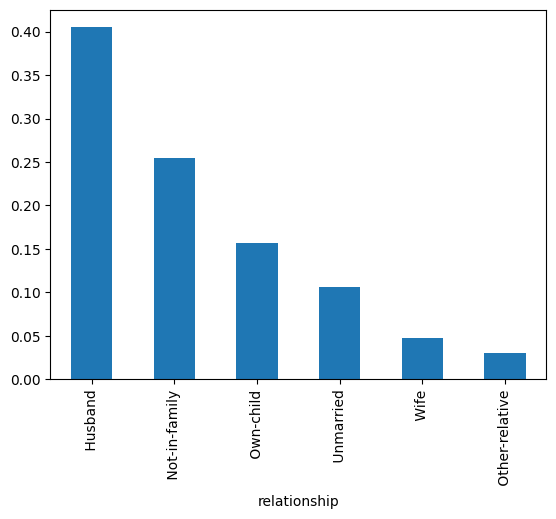

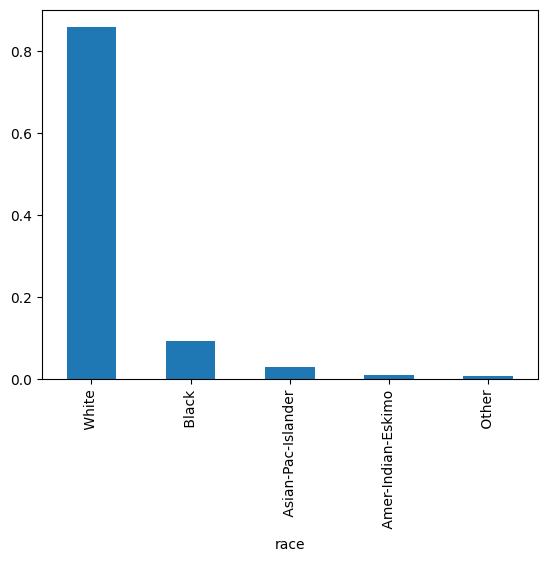

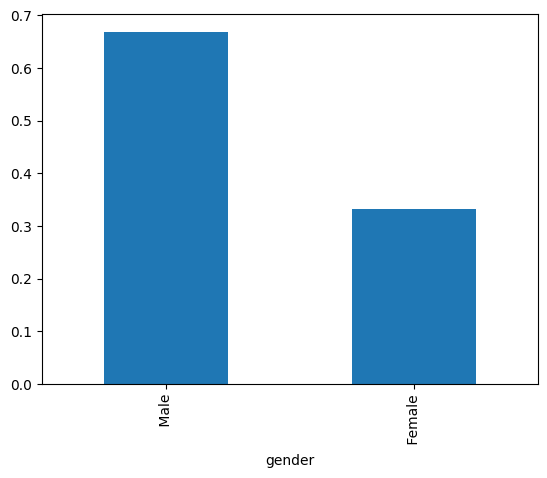

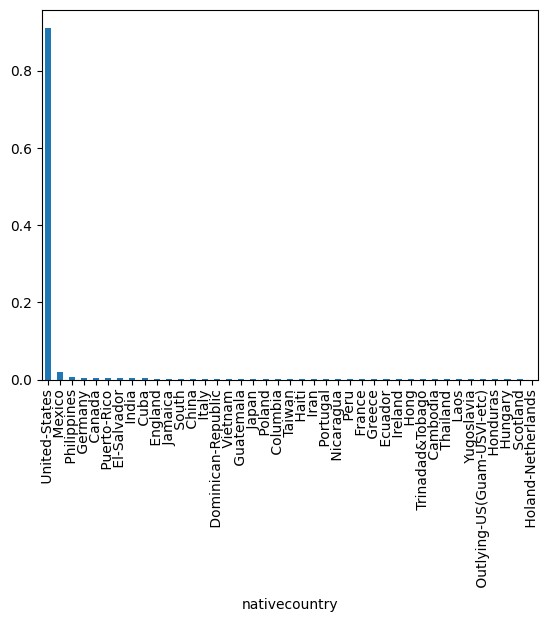

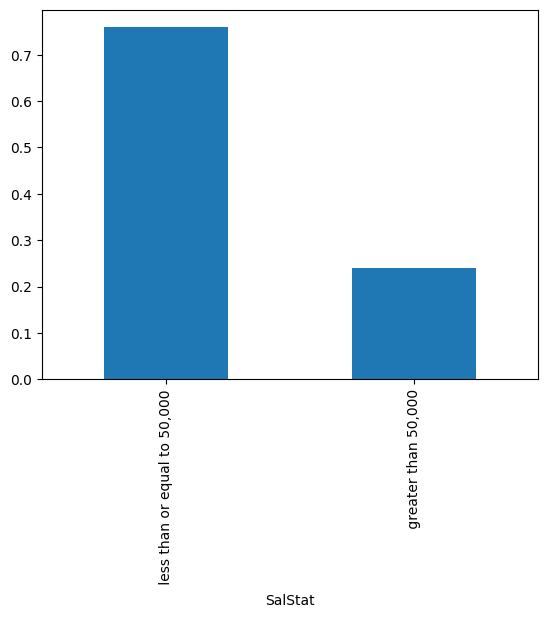

In [38]:
cat_bar_plotter(income)

## Assignment 3: Data Prep

1. Create Dummy Variables for the categorical features - check value counts to determine if any categories need to be grouped. If there are less than 10 rows in a category, group it with a larger one.
2. Split off 20% of the data to hold out as a test set, and use the rest for training. There should be 4 datasets, one each for the features and target for the train and test sets.